In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


In [25]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
X = dataset[['Age', 'EstimatedSalary' ] ] 

In [8]:
y = dataset['Purchased']

In [9]:
import seaborn as sns

In [10]:
sns.set()

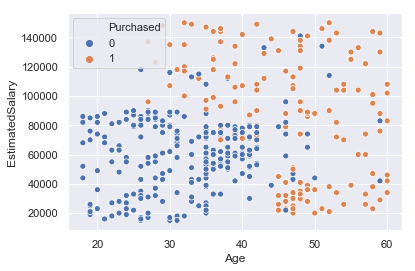

In [12]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
X = X.values

In [15]:
type(X)

numpy.ndarray

In [16]:
y = y.values

In [17]:
type(y)

numpy.ndarray

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
model = KNeighborsClassifier(n_neighbors=15)

In [67]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [68]:
model.predict([[ 61, 200000 ]] )

array([1], dtype=int64)

In [69]:
y_pred = model.predict(X_test)

In [70]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test, y_pred)

array([[47,  5],
       [13, 15]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test, y_pred)

0.775

In [82]:
error_rate = []

In [83]:
import numpy as np

In [80]:
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error_rate.append(accuracy_score(y_test, y_pred))


In [85]:
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error_rate.append( np.mean(y_test != y_pred )  ) 

In [88]:
import matplotlib.pyplot as plt

Text(0,0.5,'Error')

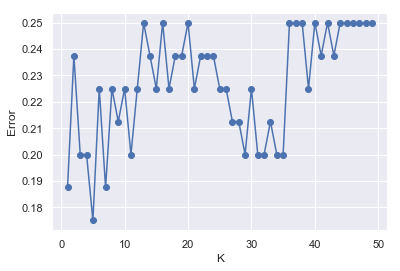

In [92]:
plt.plot(range(1,50) , error_rate, marker='o')
plt.xlabel('K')
plt.ylabel('Error')